In [236]:
import numpy as np
import pandas as pd
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [237]:
# Training parameters
learning_rate = 0.0001
training_steps = 5000
batch_size = 256
display_step = 100

In [238]:
# Load the dataset
train_data_path = 'C:\\Users\\Killian\\Desktop\\Killian\\TrainingData\\KDDTrain+.arff'
test_data_path = 'C:\\Users\\Killian\\Desktop\\Killian\\TrainingData\\KDDTest+.arff'

# Load the ARFF files
train_data, train_meta = arff.loadarff(train_data_path)
test_data, test_meta = arff.loadarff(test_data_path)

# Convert to pandas DataFrames
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

In [239]:
# Encode categorical features
## dictionary to store labelencoder objs for each categorical columns
label_encoders = {}
## iterates over each column in train_df that has datatype = object
for column in train_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    ## fit the labeleconder and return encoded labels
    train_df[column] = le.fit_transform(train_df[column])
    ## apply the same label to the corresponding column in test dataset
    test_df[column] = le.transform(test_df[column])
    ## store into dictionary
    label_encoders[column] = le

# Separate features and labels
## x_train: input variables, x_test: each row is an instance, each column is an attribute
## y_train: label/target for the corresponding instance in x_train, y_test: correspond to the label for the corresponding instance in x_test
## drop 'class' column from train dataframe (axis = 1: drop column, axis = 0: drop row), .values => transform dataframe to numpy array containing the feature values
X_train = train_df.drop('class', axis=1).values
## access the 'class' column and convert to numpy array containing the label values
y_train = train_df['class'].values
X_test = test_df.drop('class', axis=1).values
y_test = test_df['class'].values

# Standardize the features
"""
## why standardize:
have mean = 0 and standard deviation = 1 => algorithm more consistent towards the min of the loss function
ensures all features contribute equally
easier to compare importance of different features
"""

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to integers
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [240]:
# Define the MLP model
model = Sequential()
## relu: if value <= 0 => 0, if value > 0 => value
## input_dim: inform model about number of features it should expect in each input sample
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Compile the model
## loss: loss function to use to compile
## metrics: the evaluation metric
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
1969/1969 [==============================] - 2s 1ms/step - loss: 0.0442 - accuracy: 0.9858 - val_loss: 0.9917 - val_accuracy: 0.7844
Epoch 2/20
1969/1969 [==============================] - 2s 1ms/step - loss: 0.0240 - accuracy: 0.9920 - val_loss: 1.1141 - val_accuracy: 0.7681
Epoch 3/20
1969/1969 [==============================] - 2s 1ms/step - loss: 0.0200 - accuracy: 0.9933 - val_loss: 1.2304 - val_accuracy: 0.7888
Epoch 4/20
1969/1969 [==============================] - 2s 1ms/step - loss: 0.0172 - accuracy: 0.9939 - val_loss: 1.3181 - val_accuracy: 0.7899
Epoch 5/20
1969/1969 [==============================] - 2s 1ms/step - loss: 0.0150 - accuracy: 0.9946 - val_loss: 1.7791 - val_accuracy: 0.7748
Epoch 6/20
1969/1969 [==============================] - 2s 1ms/step - loss: 0.0136 - accuracy: 0.9951 - val_loss: 1.4773 - val_accuracy: 0.7944
Epoch 7/20
1969/1969 [==============================] - 2s 975us/step - loss: 0.0122 - accuracy: 0.9957 - val_loss: 1.5320 - val_accurac

705/705 [==============================] - 0s 589us/step
Accuracy on training set: 1.00
F1 Score on training set: 1.00
Accuracy on test set: 0.77
F1 Score on test set: 0.77


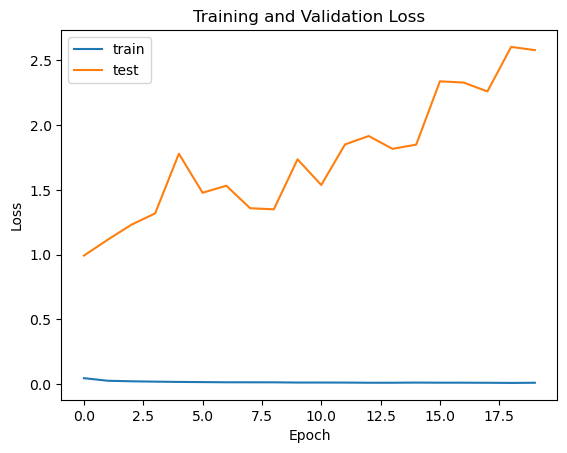

In [241]:
# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Calculate F1 scores
y_train_pred = np.argmax(model.predict(X_train), axis=1)
y_test_pred = np.argmax(model.predict(X_test), axis=1)
train_f1score = f1_score(y_train, y_train_pred, average='weighted')
test_f1score = f1_score(y_test, y_test_pred, average='weighted')

print(f'Accuracy on training set: {train_accuracy:.2f}')
print(f'F1 Score on training set: {train_f1score:.2f}')
print(f'Accuracy on test set: {test_accuracy:.2f}')
print(f'F1 Score on test set: {test_f1score:.2f}')

# Plot the loss values
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## SVM
"""
    train(41) => train(10): extract imp data
    test(41) => AE => test(10)
    support vector machine (SVM)
    focus MLP + AE =>
"""